1. What is a Support Vector Machine (SVM)?
SVM is a supervised machine learning algorithm used for classification and regression. It finds the optimal hyperplane that maximizes the margin between different classes in the feature space, ensuring better generalization.

2. Difference between Hard Margin and Soft Margin SVM

Hard Margin: No misclassification allowed; requires perfectly separable data. Sensitive to noise and outliers.

Soft Margin: Allows some misclassification with a penalty (controlled by C) to handle overlapping classes and noisy data.

3. Mathematical intuition behind SVM
SVM aims to maximize the margin
2
∣
∣
𝑤
∣
∣
∣∣w∣∣
2
​
  between two classes while minimizing classification errors.
Optimization problem:

min
⁡
𝑤
,
𝑏
1
2
∣
∣
𝑤
∣
∣
2
s.t.
𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
w,b
min
​
  
2
1
​
 ∣∣w∣∣
2
 s.t. y
i
​
 (w⋅x
i
​
 +b)≥1
4. Role of Lagrange Multipliers in SVM
Lagrange Multipliers are used in the optimization process to transform the constrained optimization problem into its dual form, making it easier to handle and allowing the use of the kernel trick.

5. What are Support Vectors in SVM?
Support Vectors are the data points closest to the decision boundary (hyperplane). They determine the position and orientation of the hyperplane, and removing them would change the decision boundary.

6. What is a Support Vector Classifier (SVC)?
SVC is the classification implementation of SVM. It finds the optimal separating hyperplane for classification tasks using kernels, margin maximization, and penalty parameters.

7. What is a Support Vector Regressor (SVR)?
SVR is the regression variant of SVM. It tries to fit the best line (or hyperplane) within a tolerance margin (epsilon) around the actual values, penalizing points outside the margin.

8. What is the Kernel Trick in SVM?
The Kernel Trick maps data into a higher-dimensional space without explicitly computing the transformation. This allows SVM to handle non-linear decision boundaries efficiently.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

Linear Kernel: Suitable for linearly separable data; faster.

Polynomial Kernel: Captures polynomial relationships; complexity depends on degree.

RBF Kernel: Handles complex, non-linear boundaries; depends on gamma.

10. Effect of the C parameter in SVM

High C: Low bias, high variance; fewer misclassifications but risk of overfitting.

Low C: High bias, low variance; larger margin, more tolerant to misclassification.

11. Role of Gamma parameter in RBF Kernel SVM
Gamma defines the influence of a single training example.

High Gamma: Small radius of influence → complex boundary → possible overfitting.

Low Gamma: Large radius → smoother boundary → possible underfitting.

12. What is the Naïve Bayes classifier, and why is it called “Naïve”?
Naïve Bayes is a probabilistic classifier based on Bayes’ theorem, assuming features are conditionally independent given the class label. It’s “naïve” because in reality, features are often correlated.

13. What is Bayes’ Theorem?

𝑃(𝐴∣𝐵)=𝑃(𝐵∣𝐴)⋅𝑃(𝐴)𝑃(𝐵)
P(A∣B)= P(B)
P(B∣A)⋅P(A)
​

It relates the conditional probability of event A given B to the likelihood of B given A, prior probability of A, and probability of B.

14. Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes

Gaussian: Assumes continuous features follow a normal distribution.

Multinomial: Suitable for count-based features (e.g., word frequencies in text).

Bernoulli: Suitable for binary features (presence/absence of a word).

15. When to use Gaussian Naïve Bayes
Use Gaussian NB when features are continuous and roughly follow a normal distribution (e.g., height, weight, temperature data).

16. Key assumptions made by Naïve Bayes

Features are conditionally independent given the class.

Each feature contributes equally and independently to the probability calculation.

17. Advantages and disadvantages of Naïve Bayes

Advantages: Simple, fast, works well with small datasets, good for high-dimensional text data.

Disadvantages: Independence assumption rarely holds, probability estimates can be unreliable.

18. Why is Naïve Bayes good for text classification?
Text data often has high dimensionality and sparse features. The independence assumption simplifies computation, and NB models handle sparse word counts efficiently.

19. Compare SVM and Naïve Bayes for classification tasks

SVM: Better for complex boundaries, works well with fewer features, sensitive to hyperparameters.

Naïve Bayes: Faster, works well with large feature sets (like text), but weaker if features are highly correlated.

20. How does Laplace Smoothing help in Naïve Bayes?
Laplace Smoothing (add-one smoothing) prevents zero probabilities for unseen feature–class combinations by adding a small constant to frequency counts, ensuring better generalization.

In [1]:
# Q21: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = svm.SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [2]:
# Q22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

clf_lin = SVC(kernel='linear', random_state=1).fit(X_train, y_train)
clf_rbf = SVC(kernel='rbf', random_state=1).fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, clf_lin.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, clf_rbf.predict(X_test)))


Linear Kernel Accuracy: 0.9555555555555556
RBF Kernel Accuracy: 0.5777777777777777


In [3]:
# Q23: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10, gamma='scale')
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.30004162624663605


/tmp/ipython-input-1939529444.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x')


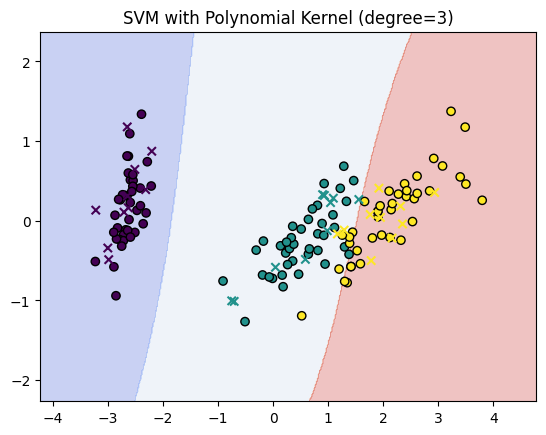

In [4]:
# Q24: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

data = load_iris()
X = data.data
y = data.target

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X_train, y_train)

# Plot decision boundary
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.show()


In [5]:
# Q25: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [6]:
# Q26: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all')
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=42
)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8499575551782682


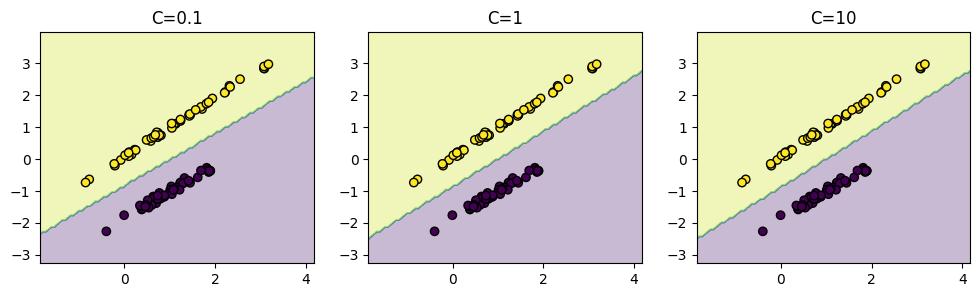

In [7]:
# Q27: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=100, random_state=42)

C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 3))

for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plt.subplot(1, 3, i+1)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.title(f"C={C}")
plt.show()


In [8]:
# Q28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create synthetic binary dataset
X = np.random.randint(2, size=(100, 10))
y = np.random.randint(2, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4


In [9]:
# Q29: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
clf_no_scale = SVC()
clf_no_scale.fit(X_train, y_train)
acc_no_scale = accuracy_score(y_test, clf_no_scale.predict(X_test))

# With scaling
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

clf_scale = SVC()
clf_scale.fit(X_train_s, y_train)
acc_scale = accuracy_score(y_test, clf_scale.predict(X_test_s))

print("Accuracy without scaling:", acc_no_scale)
print("Accuracy with scaling:", acc_scale)


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [10]:
# Q30: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GaussianNB does not have Laplace smoothing directly, but var_smoothing acts similarly
model_default = GaussianNB()
model_default.fit(X_train, y_train)
pred_default = model_default.predict(X_test)

model_smooth = GaussianNB(var_smoothing=1e-6)
model_smooth.fit(X_train, y_train)
pred_smooth = model_smooth.predict(X_test)

print("Default Predictions Sample:", pred_default[:10])
print("With Smoothing Predictions Sample:", pred_smooth[:10])


Default Predictions Sample: [1 0 0 1 1 0 0 0 1 1]
With Smoothing Predictions Sample: [1 0 0 1 1 0 0 0 1 1]


In [11]:
# Q31: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9833333333333334


In [12]:
# Q32: Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting to check if it improves accuracy

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=0, flip_y=0,
                           n_features=5, n_clusters_per_class=1, n_samples=500, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_no_weight = SVC()
clf_no_weight.fit(X_train, y_train)

clf_weighted = SVC(class_weight='balanced')
clf_weighted.fit(X_train, y_train)

print("Accuracy without class weights:", accuracy_score(y_test, clf_no_weight.predict(X_test)))
print("Accuracy with class weights:", accuracy_score(y_test, clf_weighted.predict(X_test)))


Accuracy without class weights: 0.99
Accuracy with class weights: 1.0


In [13]:
# Q33: Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample spam dataset
emails = ["Win money now", "Lowest price offer", "Meeting schedule attached", "Project deadline tomorrow",
          "Claim your prize", "Lunch at 1 PM", "Free entry in contest", "Report review pending"]
labels = [1, 1, 0, 0, 1, 0, 1, 0]  # 1=spam, 0=not spam

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.25, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


In [14]:
# Q34: Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

print("SVM Accuracy:", svm_acc)
print("Naïve Bayes Accuracy:", nb_acc)


SVM Accuracy: 0.9666666666666667
Naïve Bayes Accuracy: 0.9666666666666667


In [15]:
# Q35: Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without feature selection
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_no_fs = accuracy_score(y_test, nb.predict(X_test))

# With feature selection
selector = SelectKBest(f_classif, k=2)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

nb_fs = GaussianNB()
nb_fs.fit(X_train_fs, y_train)
acc_fs = accuracy_score(y_test, nb_fs.predict(X_test_fs))

print("Accuracy without FS:", acc_no_fs)
print("Accuracy with FS:", acc_fs)


Accuracy without FS: 0.9666666666666667
Accuracy with FS: 0.9666666666666667


In [16]:
# Q36: Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)

ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))


OvR Accuracy: 0.7333333333333333
OvO Accuracy: 0.7333333333333333


In [17]:
# Q37: Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{k} Kernel Accuracy:", acc)


linear Kernel Accuracy: 0.956140350877193
poly Kernel Accuracy: 0.9210526315789473
rbf Kernel Accuracy: 0.9298245614035088


In [18]:
# Q38: Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

data = load_iris()
X, y = data.data, data.target

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(SVC(), X, y, cv=skf)

print("Scores:", scores)
print("Average Accuracy:", np.mean(scores))


Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Average Accuracy: 0.9666666666666668


In [19]:
# Q39: Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf_default = GaussianNB()
clf_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, clf_default.predict(X_test))

clf_prior = GaussianNB(priors=[0.2, 0.5, 0.3])
clf_prior.fit(X_train, y_train)
acc_prior = accuracy_score(y_test, clf_prior.predict(X_test))

print("Default priors Accuracy:", acc_default)
print("Custom priors Accuracy:", acc_prior)


Default priors Accuracy: 0.9666666666666667
Custom priors Accuracy: 0.9333333333333333


In [20]:
# Q40: Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without RFE
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
acc_no_rfe = accuracy_score(y_test, clf.predict(X_test))

# With RFE
selector = RFE(clf, n_features_to_select=2)
selector.fit(X_train, y_train)
acc_rfe = accuracy_score(y_test, selector.predict(X_test))

print("Accuracy without RFE:", acc_no_rfe)
print("Accuracy with RFE:", acc_rfe)


Accuracy without RFE: 1.0
Accuracy with RFE: 0.9666666666666667


In [21]:
# Q41: Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.9210526315789473
Recall: 0.9722222222222222
F1-Score: 0.9459459459459459


In [22]:
# Q42: Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 0.37125554670251204


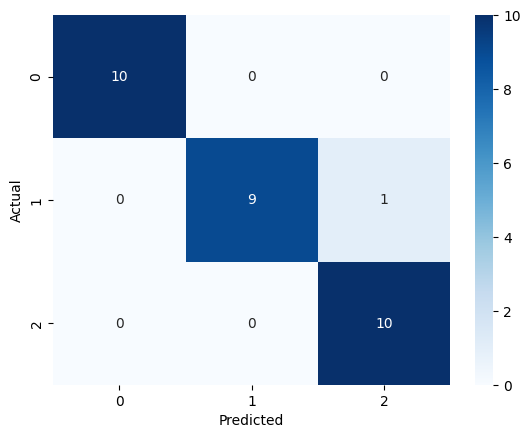

In [23]:
# Q43: Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
# Q44: Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10)
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.36594278412299164


In [25]:
# Q45: Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.9877645502645502


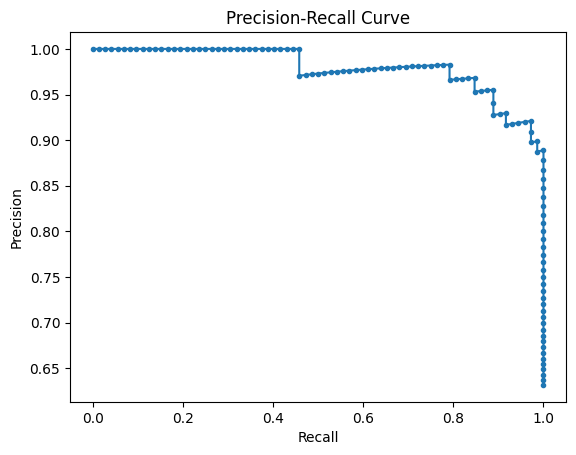

In [26]:
# Q46: Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
